<a href="https://colab.research.google.com/github/LiviaMitrica/Intelligent-Modelling/blob/main/IM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset used for "Detecting Cognitive Distortions from Patient-Therapist Interactions" by Sagarika Shreevastava and Peter W. Foltz -

Annotated_data.csv contains the 2530 annotated samples of the patient's input. This file contains the following columns:

* ID_number: This can be used to match the respective therapist responses from the Therapist_responses.csv file.
Patient Question: This column has the Patient's questions that they posted for the therapists to respond.
* Distorted part: The annotators were asked to select the sentences that indicated the presence of some distorted thinking. This column was left empty if no distortion was detected in a Patient's question.
* Dominant Distortion: Due to the subjective nature of the task, it is not necessary that a single input will only contain a single distortion. The annotators were asked to select the most dominant distortion in the input for this column. If no distorion was detected then this column contains "No distortion".
* Secondary distortion (Optional): This option was given to the annotators if they could not decide which the dominant distortion was among two types of cognitive distortions. If they could identify a single dominant distorion or if there was no distoriton detected, then this field was left empty.

Types of Distortions marked in the dataset:

1. **All-or-nothing thinking**\
This is a kind of polarized thinking. This involves looking at a situation as either black or white or thinking that there are only two possible outcomes to a situation. An example of such thinking is, "If I am not a complete success at my job; then I am a total failure."

2. **Overgeneralization**\
When major conclusions are drawn based on limited information, or some large group is said to have same behavior or property. For example: “one nurse was rude to me, this means all medical staff must be rude.” or “last time I was in the pool I almost drowned, I am a terrible swimmer and should not go into the water again”.

3. **Mental filter**\
A person engaging in filter (or “mental filtering) takes the negative details and magnifies those details while filtering out all positive aspects of a situation. This means: focusing on negatives and ignoring the positives. If signs of either of these are present, then it is marked as mental filter.

4. **Should statements**\
Should statements (“I should pick up after myself more”) appear as a list of ironclad rules about how a person should behave, this could be about the speaker themselves or other. It is NOT necessary that the word ‘should’ or it’s synonyms (ought to, must etc.) be present in the statements containing this distortion. For example: consider the statement – “I don’t have ups and downs like teenagers are supposed to; everything just seems kind of flat with a few dips”, this suggests that the person believes that a teenager should behave in a certain way and they are not conforming to that pattern, this makes it a should statement cognitive distortion.

5. **Labeling**\
Labeling is a cognitive distortion in which people reduce themselves or other people to a single characteristic or descriptor, like “I am a failure.” This can also be a positive descriptor such as “we were perfect”. Note that the tense in these does not always have to be present tense.

6. **Personalization**\
Personalizing or taking up the blame for a situation which is not directly related to the speaker. This could also be assigning the blame to someone who was not responsible for the situation that in reality involved many factors and was out of your/the person’s control. The first entry in the sample is a good example for this.

7. **Magnification**\
Blowing things way out of proportion. For example: “If I don’t pass this test, I would never be successful in my career”. The impact of the situation here is magnified. You exaggerate the importance of your problems and shortcomings, or you minimize the importance of your desirable qualities. Not to be confused with mental filter, you can think of it only as maximizing the importance or impact of a certain thing.

8. **Emotional Reasoning**\
Basically, this distortion can be summed up as - “If I feel that way, it must be true.” Whatever a person is feeling is believed to be true automatically and unconditionally. One of the most common representation of this is some variation of – ‘I feel like a failure so I must be a failure’. It does not always have to be about the speaker themselves, “I feel like he is not being honest with me, he must be hiding something” is also an example of emotional reasoning.

9. **Mind Reading**\
Any evidence of the speaker suspecting what others are thinking or what are the motivations behind their actions. Statements like “they won’t understand”, “they dislike me” suggest mind reading distortion. However, “she said she dislikes me” is not a distortion, but “I think she dislikes me since she ignored me” is again mind reading distortion (since it is based on assumption that you know why someone behaved in a certain way).

10. **Fortune-telling**\
As the name suggests, this distortion is about expecting things to happen a certain way, or assuming that thing will go badly. Counterintuitively, this distortion does not always have future tense, for example: “I was afraid of job interviews so I decided to start my own thing” here the person is speculating that the interview will go badly and they will not get the job and that is why they decided to start their own business. Despite the tense being past, the error in thinking is still fortune-telling.




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('gdrive/MyDrive/Uni/Master/An1/Sem2/IM/Annotated_data.csv')
df = data.drop(['Id_Number'], axis = 1)

df.head()

,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Patient Question                 2530 non-null   object
 1   Distorted part                   1597 non-null   object
 2   Dominant Distortion              2530 non-null   object
 3   Secondary Distortion (Optional)  416 non-null    object
dtypes: object(4)
memory usage: 79.2+ KB


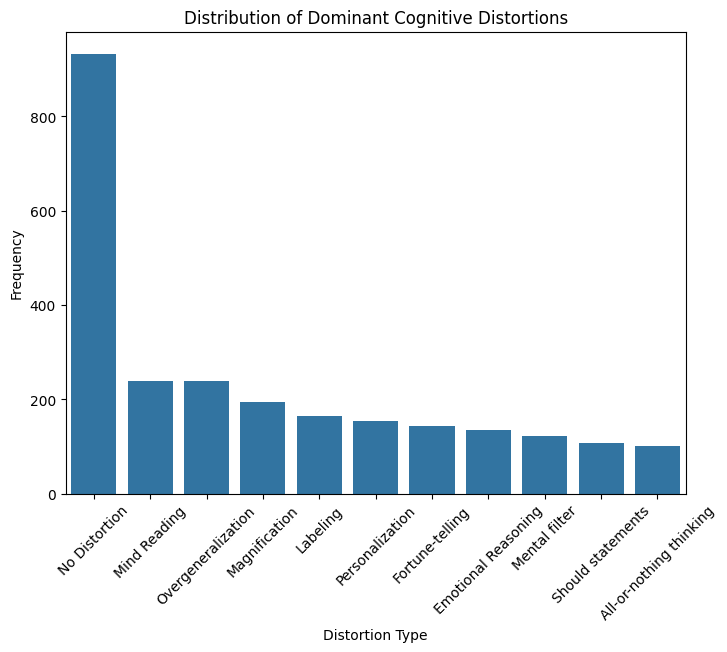

In [ ]:
distortion_counts = df['Dominant Distortion'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=distortion_counts.index, y=distortion_counts.values)
plt.title('Distribution of Dominant Cognitive Distortions')
plt.xlabel('Distortion Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

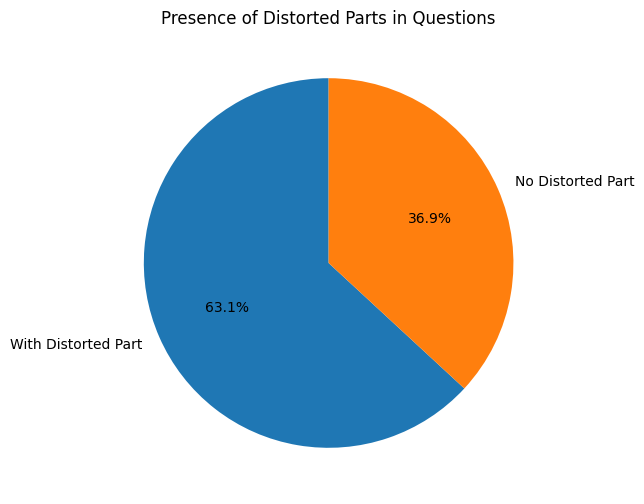

In [ ]:
has_distorted_part = df['Distorted part'].notnull().sum()
no_distorted_part = df['Distorted part'].isnull().sum()
distorted_part_data = [has_distorted_part, no_distorted_part]

plt.figure(figsize=(6, 6))
plt.pie(distorted_part_data, labels=['With Distorted Part', 'No Distorted Part'], autopct='%1.1f%%', startangle=90)
plt.title('Presence of Distorted Parts in Questions')
plt.show()

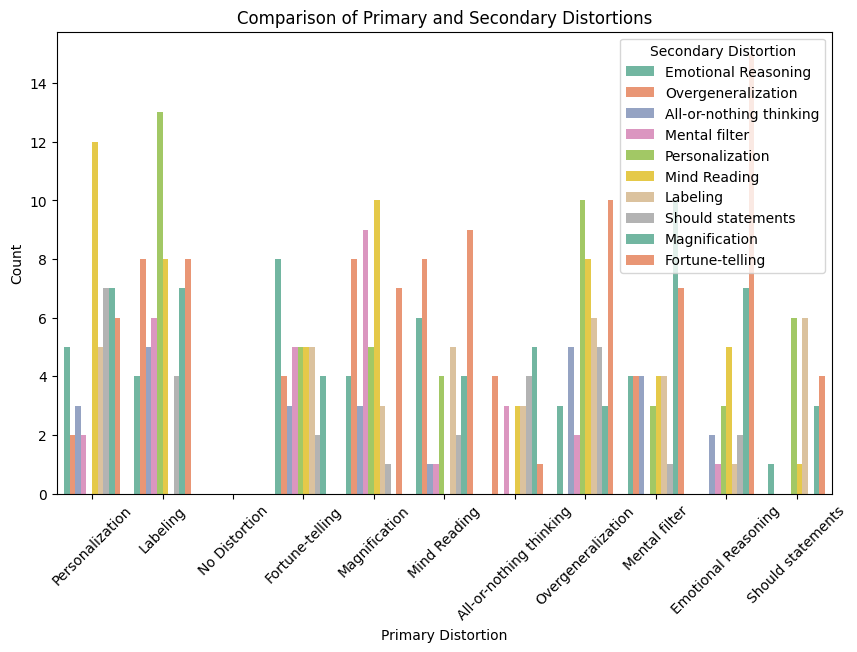

In [ ]:
secondary_distortion_counts = df['Secondary Distortion (Optional)'].value_counts().dropna()

plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant Distortion', data=df, hue='Secondary Distortion (Optional)', palette='Set2')
plt.title('Comparison of Primary and Secondary Distortions')
plt.xlabel('Primary Distortion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Secondary Distortion')
plt.show()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# Calculate the length of patient questions in terms of words
df['Question_Length'] = df['Patient Question'].apply(lambda x: len(x.split()))

# Calculate the length of distorted parts in terms of words
df['Distorted_Length'] = df['Distorted part'].apply(lambda x: 0 if pd.isnull(x) else len(x.split()))

# Calculate the percentage of distortion in each question
df['Distortion_Percentage'] = (df['Distorted_Length'] / df['Question_Length']) * 100

# Display the first few rows of the DataFrame with the calculated columns
print(df[['Patient Question', 'Question_Length', 'Distorted part', 'Distorted_Length', 'Distortion_Percentage']].head())

# Filter out rows where Distorted_Length is not zero
non_zero_distortion_df = df[df['Distorted_Length'] != 0]

# Calculate the average percentage of distortion for non-zero values
average_non_zero_distortion_percentage = non_zero_distortion_df['Distortion_Percentage'].mean()
print("Average Percentage of Distortion for Non-zero Values:", average_non_zero_distortion_percentage)

                                    Patient Question  Question_Length  \
0  Hello, I have a beautiful,smart,outgoing and a...              131   
1  Since I was about 16 years old I’ve had these ...              292   
2   So I’ve been dating on and off this guy for a...              447   
3  My parents got divorced in 2004. My mother has...              181   
4  I don’t really know how to explain the situati...              295   

                                      Distorted part  Distorted_Length  \
0  The voice are always fimilar (someone she know...                27   
1  I feel trapped inside my disgusting self and l...                59   
2                                                NaN                 0   
3                                                NaN                 0   
4  I refused to go because I didn’t know if it wa...                54   

   Distortion_Percentage  
0              20.610687  
1              20.205479  
2               0.000000  
3       

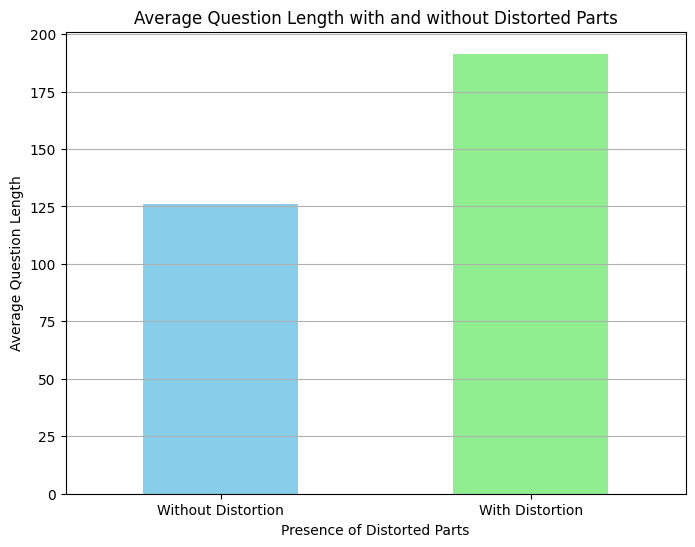

In [ ]:
# Group the data by the presence of distorted parts and calculate the mean question length
grouped_data = df.groupby(df['Distorted_Length'] > 0)['Question_Length'].mean()

# Plot the grouped bar chart
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Question Length with and without Distorted Parts')
plt.xlabel('Presence of Distorted Parts')
plt.ylabel('Average Question Length')
plt.xticks([0, 1], ['Without Distortion', 'With Distortion'], rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import string
import nltk

In [ ]:
def count_words_freq(texts, n_most_common_words = 50):
  # Download NLTK resources if not already downloaded
  nltk.download('punkt')
  nltk.download('stopwords')

  # Initialize a stemmer and set of stop words
  stemmer = PorterStemmer()
  stop_words = set(stopwords.words('english'))

  # Initialize a translation table to remove punctuation
  translator = str.maketrans('', '', string.punctuation)

  # Tokenize the parts into individual words, remove stop words, punctuation, and perform stemming
  all_words = ' '.join(texts).lower()  # Combine all parts into a single string
  tokens = word_tokenize(all_words)
  filtered_words = [stemmer.stem(word) for word in tokens if word not in stop_words and word.isalnum()]
  stemmed_words = [word.translate(translator) for word in filtered_words if word.translate(translator)]

  # Count the frequency of each word
  word_freq = Counter(stemmed_words)

  # Select the n_most_common_words most common words
  most_common_words = word_freq.most_common(n_most_common_words)

  # Display the n_most_common_words most common words
  print(f"{n_most_common_words} Most Common Words (after removing stop words, punctuation, and stemming):")
  for word, freq in most_common_words:
      print(f"{word}: {freq}")

In [ ]:
# Filter the DataFrame to include only rows where distorted parts exist
count_words_freq(df[df['Distorted part'].notnull()]['Distorted part'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


50 Most Common Words (after removing stop words, punctuation, and stemming):
feel: 743
like: 508
think: 301
know: 298
get: 292
want: 269
time: 239
thing: 234
go: 210
alway: 200
even: 193
peopl: 190
realli: 178
make: 176
never: 163
life: 162
would: 153
year: 150
tri: 147
one: 145
thought: 143
talk: 142
someth: 141
seem: 135
friend: 131
start: 126
person: 125
anyth: 111
say: 110
everyth: 106
tell: 102
day: 99
problem: 99
also: 99
relationship: 98
much: 96
famili: 95
help: 91
sinc: 90
depress: 90
way: 88
bad: 84
emot: 84
lot: 82
see: 81
worri: 81
someon: 79
hate: 79
love: 78
afraid: 76
